In [1]:
def Dominating_number(G):
    return G.dominating_set(total = False, value_only = True)
def Total_dominating_number(G):
    return G.dominating_set(total = True, value_only = True)

def LP_dominating_number(G):
    p = MixedIntegerLinearProgram(maximization = False)
    b = p.new_variable(real = True, nonnegative = True)
    p.set_min(b, 0)
    p.set_max(b, 1)
    p.set_objective(sum([b[v] for v in G]))

    for u in G:
        p.add_constraint(b[u] + sum([b[v] for v in G.neighbors(u)]) >= 1)

    return p.solve()

def LP_total_dominating_number(G):
    p = MixedIntegerLinearProgram(maximization = False)
    b = p.new_variable(real = True, nonnegative = True)
    p.set_min(b, 0)
    p.set_max(b, 1)
    p.set_objective(sum([b[v] for v in G]))

    for u in G:
        p.add_constraint(sum([b[v] for v in G.neighbors(u)]) >= 1)

    return p.solve()

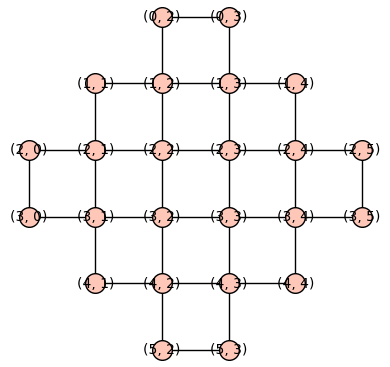

In [67]:
graphs.AztecDiamondGraph(3).show()


In [65]:
def Fib(a,b,n):
    i = 0
    while i < n:
        a,b = b, a+b
        i += 1
    return a

In [67]:

def D_for_FibonacciTree(n):
    seed = [0,1,1,2,3]
    if n < len(seed):
        return seed[n]
    else:
        for i in range(len(seed), n+1):
            seed.append(Fib(0,1,i) + seed[0])
            seed.pop(0)
    return seed[-1]


In [105]:
# formula za toadominacijsko stevilo
# ce n-1 deli 6 ne vrne pravilno drugace pa

def T_for_FibonacciTree(n):
    seed = [0,0,2,2,4,6]
    if n < len(seed):
        return seed[n]
    else:
        for i in range(len(seed), n+1):
            seed.append(Fib(2,2,i-2) + seed[0]) 
            seed.pop(0)
    return seed[-1]



In [119]:
# FibonacciTree(n)
# D(n) = Fib(0,1,n) + D(n-5) = D(G)_lp
# T(n) = Fib(2,2,n-2) + T(n-6) = T(n)_lp

In [70]:
for n in range(1, 11):
    G = graphs.AztecDiamondGraph(n)
    #print(LP_dominating_number(G))
    print(LP_total_dominating_number(G))

2.0
4.0
8.0
12.0
18.0
24.0
32.0
40.0
50.0
60.0


In [24]:
[ for n in range(3, 20)]

[2.00000000000000,
 2.00000000000000,
 3.00000000000000,
 4.00000000000000,
 4.00000000000000,
 4.00000000000000,
 5.00000000000000,
 6.00000000000000,
 6.00000000000000,
 6.00000000000000,
 7.00000000000000,
 8.00000000000000,
 8.00000000000000,
 8.00000000000000,
 9.00000000000000,
 10.0000000000000,
 10.0000000000000]

In [44]:
import math

In [86]:
[Total_dominating_number(graphs.AztecDiamondGraph(n)) - Total_dominating_number(graphs.AztecDiamondGraph(n-1)) for n in range(3, 25)]

[4,
 4,
 6,
 6,
 8,
 8,
 10,
 10,
 12,
 12,
 14,
 14,
 16,
 16,
 18,
 18,
 20,
 20,
 22,
 22,
 24,
 24]

In [57]:
[1+ (n)//2 for n in range(3, 15)]

[2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8]

In [39]:
[2 + (n-2)*(2/3) for n in range(3, 15)]

[8/3, 10/3, 4, 14/3, 16/3, 6, 20/3, 22/3, 8, 26/3, 28/3, 10]

In [ ]:
# CycleGraph(n)
# D(G) = (n+2)//3
# D(G)_lp = n/3
# T(G) = (1/4) * (2*(n-1) + 1j * (-1j)**(n-1) - 1j * (1j)**(n-1) + 4)
# T(G)_lp = n/2

In [173]:
# GeneralizedPetersenGraph(n, 1)
# D(G) = (1/4) * (2*(n-1) + 1j * (-1j)**(n-1) - 1j * (1j)**(n-1) + 4) = isto kot T(g) pri CycleGraph
# D(G)_lp = n/2
# T(G) = vzorec je prevec tezaven, liho stevilo nastopi samo, ko je n = 6k+1, meji:  n*(2/3) < T(G) < 2 + n*(2/3)
# T(G)_lp = 2 + (n-3)*(2/3)

In [ ]:
# LadderGraph(n)
# D(G) = (1/4) * (-1)**(i-1) * (2 * (-1)**(i-1) * (i-1) + 5 * (-1)**(i-1) - 1)
# D(G)_lp = (i+1)/2, približek ki je zelo dober, vedno je <= D(G)
# T(G) = 2*((n+2)//3) = T(G)_lp

In [ ]:
# AztecDiamondGraph(n)
# D(G) = D_for_Aztec(n) = 
# T(G) = T_for_Aztec(n) = T(G)_lp

In [8]:



def T_for_Aztec(n):
    seed = 0
    for i in range(1, n+1):
        seed += (1/2)*(2*i + (-1)**(i+1) + 1)
    return seed



In [74]:

def D_for_Aztec(n):
    result = []
    current_number = 2

    for i in range(1, n + 1):
        repetition = 3 if current_number % 4 == 0 else 2
        result.extend([current_number] * repetition)
        current_number += 2

    return sum(result[:n+1])


In [85]:
for n in range(1, 40):
    G = graphs.AztecDiamondGraph(n)
    p = LP_dominating_number(G)
    e = D_for_Aztec(n)
    e1 = p + 2*(p**(1/2))
    print(e - e1)

0.35726558990816404
0.0
1.1010205144336442
-0.32455532033675993
0.5166852264521182
0.036439079917336414
0.6002207529723336
1.0001972403852832
-0.410282153075201
0.5418485049069872
-0.2962751328386872


0.6625145274199014
0.9469920286585278


-0.702177871239229


0.8312993034424352


-0.8021041660178128


0.9540985548107415


0.5069895566635978


-0.34361180224621535


0.5873278049505473


-0.8902024342533537


1.1931873530157588


0.01063348709993761


-0.25149973880036214


0.2983329899810201


-0.9795440616927635


1.1715997299078822


-0.5287820814580186


0.24523380770864378


-0.4201293216893873


-0.566047824015584


0.8396702338112618


-0.36563221212134067


0.39438713711138007


-0.8966497305009398


KeyboardInterrupt: 

In [2]:
# g.num_verts(), g.num_edges()

In [3]:
# graphs.AztecDiamondGraph(i)
# i   : 0, 1,  2,  3,  4,   5,   6,   7,   8,   9,  10, 11
# D(g): 0, 2,  4,  8, 12,  16,  22,  28,  36,  44,  52, ...
# T(g): 0, 2,  4,  8, 12,  18,  24,  32,  40,  50,  60, 72

"""
Formula za T(g) za input n, testirana do n = 40
seed = 0
for i in range(1, n+1):
    seed += (1/2)*(2*i + (-1)**(i+1) + 1)
print(seed)
"""

"""
Formula za D(g) za input n, za n > 10 že rabi predolgo časa, zato je samo improvizirana če se ponavlja vzorec 2,2,4,4,4,6,6,8,8,8,10,10,... med razlikami 
seed = 0
for i in range(1, n-1):
    seed += (1/2)*(2*i + (-1)**(i+1) + 1)
    if i % 4 == 0:
        seed += i
seed
"""

'\nFormula za D(g) za input n, za n > 10 že rabi predolgo časa, zato je samo improvizirana če se ponavlja vzorec 2,2,4,4,4,6,6,8,8,8,10,10,... med razlikami \nseed = 0\nfor i in range(1, n-1):\n    seed += (1/2)*(2*i + (-1)**(i+1) + 1)\n    if i % 4 == 0:\n        seed += i\nseed\n'